<ipython-input-4-1c9c6a13060c>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(data['strength'], data['y_position'], s=data['observed gene count']*10, c=colors, alpha=0.7, cmap='viridis')


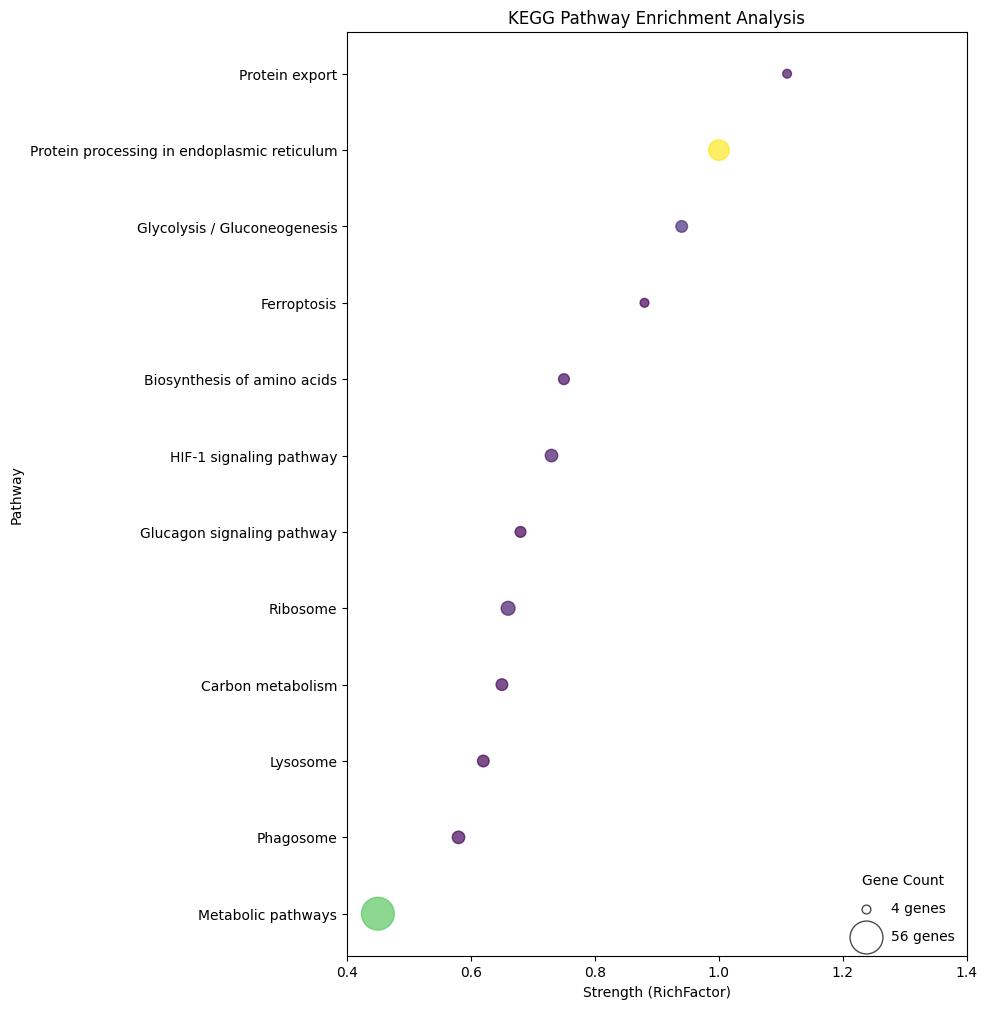

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar o arquivo CSV com o delimitador correto
file_path = '/content/KEGG_pre_eclampsia.csv'
data = pd.read_csv(file_path, delimiter=';')

# Calcular -log10(FDR)
data['-log10(FDR)'] = -np.log10(data['false discovery rate'])

# Ordenar as vias pelo valor de strength em ordem decrescente
data = data.sort_values(by='strength', ascending=True).reset_index(drop=True)

# Atribuir valores inteiros ao eixo y baseados na ordem das vias
data['y_position'] = data.index + 1

# Normalizar os valores de -log10(FDR) para mapeamento de cores
norm = plt.Normalize(data['-log10(FDR)'].min(), data['-log10(FDR)'].max())
colors = plt.cm.viridis(norm(data['-log10(FDR)']))

# Plotar o gráfico com ajuste de tamanho
fig, ax = plt.subplots(figsize=(8, 12))  # Diminuir largura e aumentar altura

# Scatter plot com variação de cor baseada em -log10(FDR)
# O tamanho das bolinhas é proporcional ao número de genes observados na via (observed gene count)
sc = ax.scatter(data['strength'], data['y_position'], s=data['observed gene count']*10, c=colors, alpha=0.7, cmap='viridis')

# Adicionar legendas para as bolinhas
# Definir o tamanho das bolinhas para a legenda
min_size = data['observed gene count'].min() * 10
max_size = data['observed gene count'].max() * 10

# Plotar bolinhas de exemplo para a legenda com cor branca
for size, count in [(min_size, data['observed gene count'].min()), (max_size, data['observed gene count'].max())]:
    ax.scatter([], [], c='white', edgecolors='black', alpha=0.7, s=size, label=f'{count} genes')

# Adicionar bolinhas coloridas de exemplo para a legenda
min_color = plt.cm.viridis(norm(data['-log10(FDR)'].min()))
max_color = plt.cm.viridis(norm(data['-log10(FDR)'].max()))

# Adicionar a legenda para as bolinhas no canto inferior direito
ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Gene Count', bbox_to_anchor=(1, 0), loc='lower right')

# Rótulos e título
ax.set_xlabel('Strength (RichFactor)')
ax.set_ylabel('Pathway')
ax.set_title('KEGG Pathway Enrichment Analysis')

# Definir y-ticks como os nomes das vias
ax.set_yticks(data['y_position'])
ax.set_yticklabels(data['term description'])

# Ajustar a dimensão do eixo x
ax.set_xlim(0.4, 1.4)

# Mostrar o gráfico
plt.show()


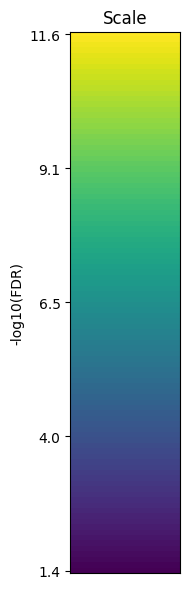

In [ ]:
# Criar uma figura separada para a escala de -log10(FDR)
fig_scale, ax_scale = plt.subplots(figsize=(2, 6))

# Definir os limites da escala de -log10(FDR)
log10_fdr_min = data['-log10(FDR)'].min()
log10_fdr_max = data['-log10(FDR)'].max()

# Plotar um gradiente de cores correspondente à escala de -log10(FDR)
gradient = np.linspace(log10_fdr_max, log10_fdr_min, 100).reshape(100, 1)
ax_scale.imshow(gradient, aspect='auto', cmap='viridis')
ax_scale.set_xticks([])
ax_scale.set_yticks(np.linspace(0, 99, 5))
ax_scale.set_yticklabels(np.linspace(log10_fdr_max, log10_fdr_min, 5).round(1))

# Adicionar rótulos e título
ax_scale.set_ylabel('-log10(FDR)')
ax_scale.set_title('Scale')

# Mostrar a escala de -log10(FDR)
plt.tight_layout()
plt.show()